In [31]:
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight

In [32]:
data_dir = pathlib.Path(r"D:\BT\2433_Emerging_Technologies\data\Set_A\Set_A\Train")

In [33]:
listImages = list(data_dir.glob('*/*.jpg')) + list(data_dir.glob('*/*.png')) + list(data_dir.glob('*/*.jpeg')) + list(data_dir.glob('*/*.jfif')) 

image_count = len(listImages)
print(image_count)
listImages

280


[WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 001.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 002.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 003.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 004.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 005.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 006.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 007.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 008.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A/Set_A/Train/10 - Hoa dam but/Hoa dam but 009.jpg'),
 WindowsPa

In [34]:
batch_size = 32
img_height = 240
img_width = 240

In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 280 files belonging to 21 classes.


Using 224 files for training.
Found 280 files belonging to 21 classes.
Using 56 files for validation.


In [36]:
class_names = train_ds.class_names 
print(class_names)

['0 - Hoa sen', '1 - Hoa hong', '10 - Hoa dam but', '11 - Hoa huong duong', '12 - Hong tu cau', '13 - Hoa oi', '14 - Hoa Tram Oi', '15 - Lan hac vy', '16 - Hoa ban', '17 - Hoa atiso', '18 - Tung tuyet mai', '19 - Hoa Phao Bong', '2 - Hoa nhai', '20 - Hoa long den', '3 - Hoa mai', '4 - Hoa anh dao', '5 - Hoa man', '6 - Hoa do quyen', '7 - Hoa sao nhai', '8 - Hoa thuoc duoc', '9 - Hoa sung']


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.3),
    layers.RandomBrightness(0.3),
    # layers.RandomTranslation(0.3, 0.3),
])

In [ ]:
num_classes = len(class_names)

# khai báo các Layers
def create_model():
  base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                             include_top=False,
                             weights='imagenet')
  base_model.trainable = False

  fine_tune_at = 20
  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
  model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    # layers.Conv2D(16, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(),
    # layers.Conv2D(32, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(),
    # layers.Conv2D(64, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(),
    # layers.Flatten(),
    # layers.Dense(128, activation='relu'),
    # layers.Dropout(0.5),
    # layers.Dense(num_classes, activation='softmax')
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
  ]) 

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=10000,
        decay_rate=0.96,
        staircase=True
    )
  model.compile(
    # optimizer='adam',
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) 
  return model

In [39]:
for class_name in class_names:
    count = len(list((data_dir / class_name).glob("*")))
    print(f"{class_name}: {count} images")

0 - Hoa sen: 10 images
1 - Hoa hong: 17 images
10 - Hoa dam but: 15 images
11 - Hoa huong duong: 15 images
12 - Hong tu cau: 13 images
13 - Hoa oi: 16 images
14 - Hoa Tram Oi: 14 images
15 - Lan hac vy: 15 images
16 - Hoa ban: 15 images
17 - Hoa atiso: 15 images
18 - Tung tuyet mai: 13 images
19 - Hoa Phao Bong: 12 images
2 - Hoa nhai: 11 images
20 - Hoa long den: 9 images
3 - Hoa mai: 14 images
4 - Hoa anh dao: 12 images
5 - Hoa man: 14 images
6 - Hoa do quyen: 11 images
7 - Hoa sao nhai: 14 images
8 - Hoa thuoc duoc: 13 images
9 - Hoa sung: 12 images


In [40]:
class StopTrainingAtAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.9:
            print(f"\n Dừng huấn luyện: Độ chính xác đạt {logs.get('accuracy')}")
            self.model.stop_training = True 
stop_callback = StopTrainingAtAccuracy()
steps_per_epoch = len(train_ds)
validation_steps = len(val_ds)

In [41]:
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

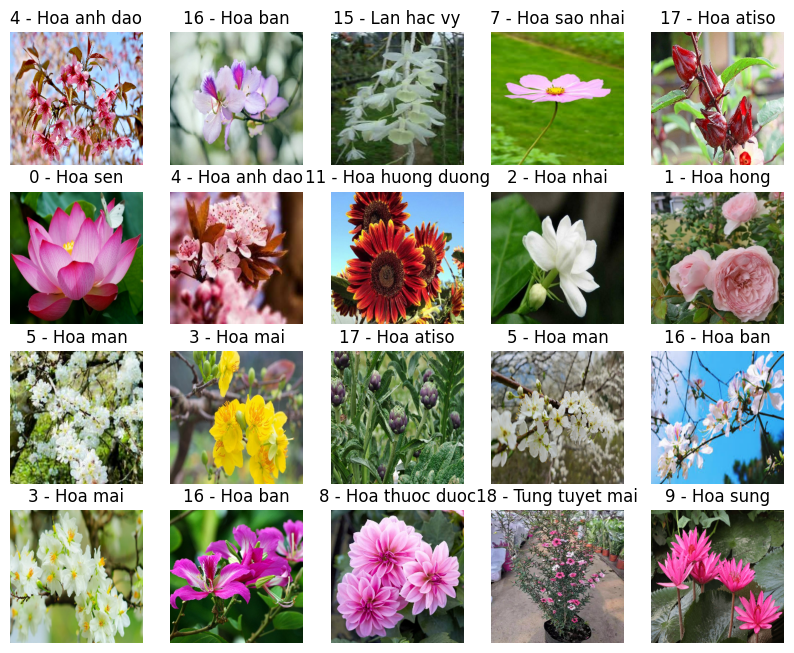

In [42]:
plt.figure(figsize=(10, 10))
train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
for images, labels in train_ds.take(1):  # Dữ liệu gốc chưa được chuẩn hóa
    for i in range(20):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

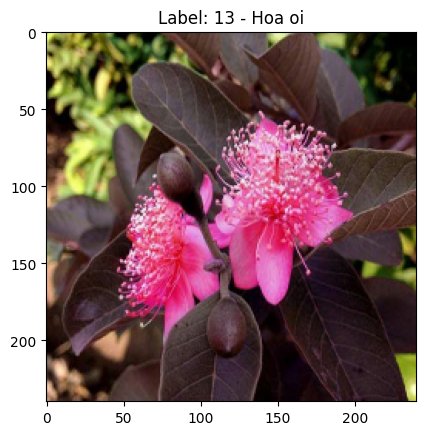

In [43]:
for images, labels in train_ds.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()

In [49]:
best_model_path = "best_model_so_far.keras"
best_val_acc_so_far = 0.0
best_model = None

# Nếu đã có model lưu từ trước, thì tải nó
if os.path.exists(best_model_path):
    print("Tải lại model tốt nhất từ trước...")
    best_model = load_model(best_model_path)
    # Cần đo lại độ chính xác validation của model này
    loss, acc = best_model.evaluate(val_ds, verbose=0)
    best_val_acc_so_far = acc
    print(f"Val Accuracy hiện tại của model đã lưu: {acc:.4f}")

Tải lại model tốt nhất từ trước...
Val Accuracy hiện tại của model đã lưu: 0.8571


In [48]:
y_train = np.concatenate([y.numpy() for x, y in train_ds])
class_weights = compute_class_weight(
      class_weight="balanced",
      classes=np.unique(y_train),
      y=y_train
  )
class_weights = dict(enumerate(class_weights))

In [46]:
attempt = 1
best_val_acc = best_val_acc_so_far
best_model_path = "best_model_so_far.keras"

while True:
    model = create_model()
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=300,
        class_weight=class_weights,
        #không cần thiết
        # steps_per_epoch=steps_per_epoch,
        # validation_steps=validation_steps,
        callbacks=[early_stop, tensorboard_callback],
        
        verbose=1
    )
    acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    print(f"Accuracy: {acc:.4f}, Val Accuracy: {val_acc:.4f}")
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        print(f"Lưu model mới tốt hơn với Val Accuracy = {val_acc:.4f}")
        model.save(best_model_path)
    
    if acc >= 1.0 and 0.8 <= val_acc <= 1.0:
        print("Đạt yêu cầu. Lưu model...")
        model.save("model_accepted.keras")
        break
    else:
        print("Chưa đạt yêu cầu. Huấn luyện lại...\n")
        attempt += 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_106908\1222130917.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(img_height, img_width, 3),


Epoch 1/300
      7/Unknown 5s 256ms/step - accuracy: 0.0441 - loss: 3.6924

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.0448 - loss: 3.6976 - val_accuracy: 0.0179 - val_loss: 3.2416
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.0741 - loss: 3.4332 - val_accuracy: 0.0179 - val_loss: 3.1160
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.0786 - loss: 3.1532 - val_accuracy: 0.0714 - val_loss: 3.0290
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.0868 - loss: 3.1244 - val_accuracy: 0.0893 - val_loss: 2.9612
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.1088 - loss: 3.0378 - val_accuracy: 0.1250 - val_loss: 2.9105
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.0637 - loss: 2.9982 - val_accuracy: 0.1607 - val_loss: 2.8647
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.1796 - loss: 2.8383 - val_accuracy: 0.1786 - val_loss: 2.8141
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.1878 - loss: 2.8266 - val_accuracy: 0.2321 - val_loss: 2.7

SystemError: D:\a\1\s\Objects\listobject.c:337: bad argument to internal function

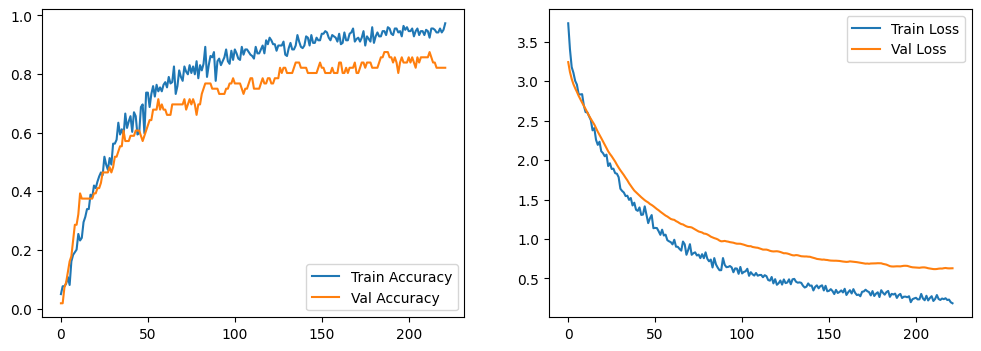

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
0 Predict 11 - Hoa huong duong with a 6.66 percent confidence. ::REAL 0_HoaSen.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1 Predict 11 - Hoa huong duong with a 6.59 percent confidence. ::REAL 10_Hoa dam but.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2 Predict 11 - Hoa huong duong with a 6.61 percent confidence. ::REAL 11_Hoa huong duong 002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3 Predict 11 - Hoa huong duong with a 6.64 percent confidence. ::REAL 12_Hong tu cau 005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4 Predict 11 - Hoa huong duong with a 6.59 percent confidence. ::REAL 13_Hoa oi 015.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
5 Predict 11 - Hoa huong duong with a 6.64 percent confidence. ::REAL 14_Hoa Tram Oi 004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6 Predict 11 - Hoa huong duong with a 6.60 percent confidence. ::REAL 15_Lan hac vy 012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
7 Predict 11 - Hoa huong duong with a 6.65 percent confidenc

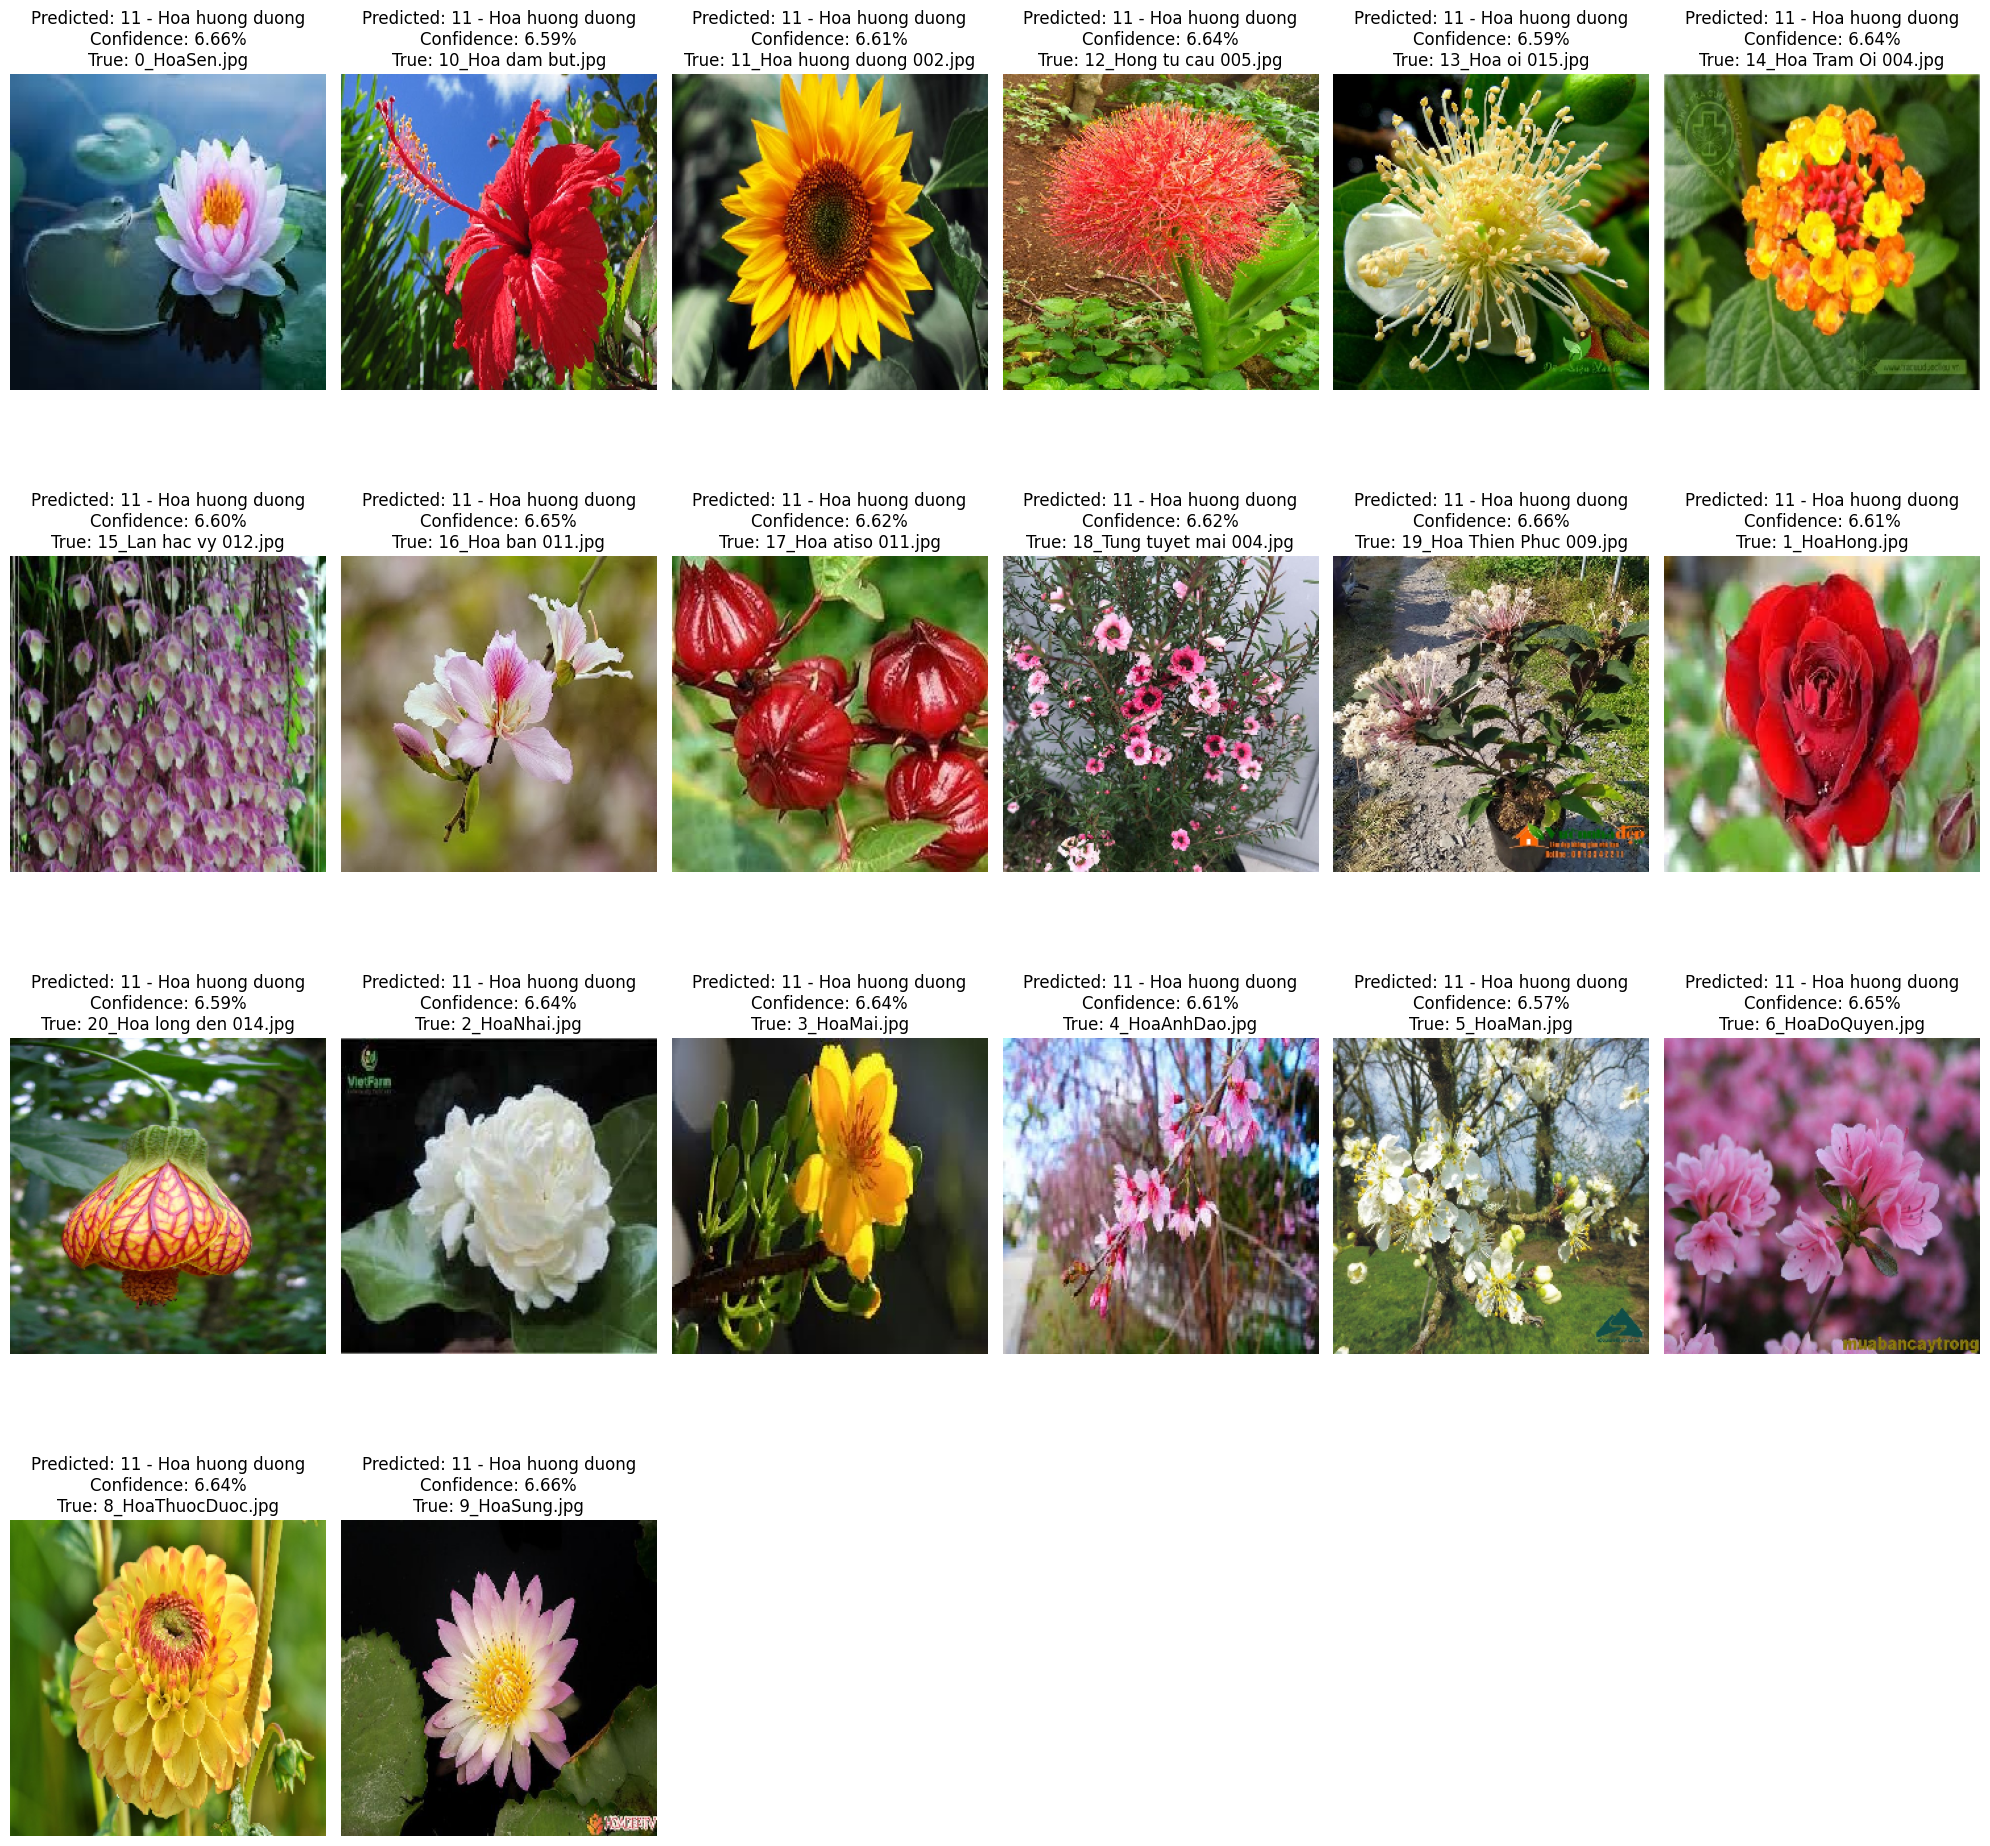

In [50]:
test_dir = pathlib.Path(r"D:\\BT\\2433_Emerging_Technologies\\data\\Set_A\\Set_A\\Test") 
listImages_test = list(test_dir.glob('*.jpg')) + list(test_dir.glob('*.webp')) + list(test_dir.glob('*.png')) + list(test_dir.glob('*.jpeg')) + list(test_dir.glob('*.jfif'))
plt.figure(figsize=(20, 20))
for i in range(len(listImages_test)):
    img = tf.keras.utils.load_img(
        listImages_test[i], target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = best_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    predicted_name = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    true_name = listImages_test[i].name  # Extract the true name from the file name
    print(i, f"Predict {predicted_name} with a {confidence:.2f} percent confidence. ::REAL {true_name}")
    plt.subplot((len(listImages_test)//6) + 1, 6, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_name}\nConfidence: {confidence:.2f}%\nTrue: {true_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(images)
confidence_scores = tf.reduce_max(predictions, axis=1)  # Lấy giá trị lớn nhất
print("Confidence Scores:", confidence_scores.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
Confidence Scores: [0.08882736 0.15353155 0.14161383 0.11040844 0.11806858 0.09949806
 0.11639892 0.10195209 0.16154334 0.0886932  0.09327984 0.09869529
 0.10767244 0.09582255 0.09241638 0.11854033 0.13343945 0.1291425
 0.07624243 0.1081867  0.14667584 0.09857699 0.09944522 0.14574511
 0.10017109 0.11046724 0.13967344 0.12837027 0.1290548  0.23970737
 0.09105991 0.14850387]
